In [693]:
import pandas as pd

In [694]:
data = pd.read_csv('../archives/sentiment_sentence_level.csv')

In [695]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,speaker,text,type,speaker_type,speaker_company,speaker_role,company_name,date,positive_sentiment_bert,negative_sentiment_bert,neutral_sentiment_bert,polarity_bert
0,0,0,0,Operator,"Good day, and welcome to the Apple Inc. Second...",presentation,Operator,NaN,NaN,AAPL.OQ,2019-Apr-30,0.177063,0.114618,0.708319,0.062445
1,1,1,0,Operator,Today's call is being recorded.,presentation,Operator,NaN,NaN,AAPL.OQ,2019-Apr-30,0.192519,0.121878,0.685603,0.070641
2,2,2,0,Operator,"At this time, for opening remarks and introduc...",presentation,Operator,NaN,NaN,AAPL.OQ,2019-Apr-30,0.208963,0.114539,0.676498,0.094423
3,3,3,0,Operator,Please go ahead.,presentation,Operator,NaN,NaN,AAPL.OQ,2019-Apr-30,0.211321,0.120633,0.668046,0.090689
4,4,4,1,Nancy Paxton,Thank you.,presentation,Corporate Participant,Apple Inc.,Senior Director of IR and Treasury,AAPL.OQ,2019-Apr-30,0.259784,0.119282,0.620935,0.140502


In [696]:
li = [1, 2, 3, 4, 5]
print(li[-3:])

[3, 4, 5]


In [697]:
# for AAPL.OQ, store positive sentiment in lists for each date
aapl = {}
data_aapl = data[data['company_name'] == 'AAPL.OQ']
# speaker_type is corportate participant
data_aapl_cp = data_aapl[data_aapl['speaker_type'] == 'Corporate Participant']
# data_aapl_cp = data_aapl
unique_dates = data_aapl_cp['date'].unique()
unique_dates.sort()
unique_dates = unique_dates[-3:]
print(unique_dates)
for date in unique_dates:
    aapl[date] = data_aapl_cp[data_aapl['date'] == date]['polarity_bert'].tolist()


['2023-May-04' '2023-Nov-02' '2024-Feb-01']


/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/3335046643.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aapl[date] = data_aapl_cp[data_aapl['date'] == date]['polarity_bert'].tolist()
/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/3335046643.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aapl[date] = data_aapl_cp[data_aapl['date'] == date]['polarity_bert'].tolist()
/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/3335046643.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aapl[date] = data_aapl_cp[data_aapl['date'] == date]['polarity_bert'].tolist()


In [698]:
start_qna = {}

for date in unique_dates:
    # start whn the q&a starts 
    data_date = data_aapl_cp[data_aapl_cp['date'] == date].reset_index()
    print(len(data_date[data_date['type'] == 'qna']))
    start_qna[date] = data_date[data_date['type'] == 'qna'].index[0]

154
172
137


In [699]:
start_qna

{'2023-May-04': 156, '2023-Nov-02': 158, '2024-Feb-01': 152}

In [700]:
# moving average
def moving_average(data, window_size):
    return [sum(data[i:i+window_size])/window_size for i in range(len(data)-window_size+1)]

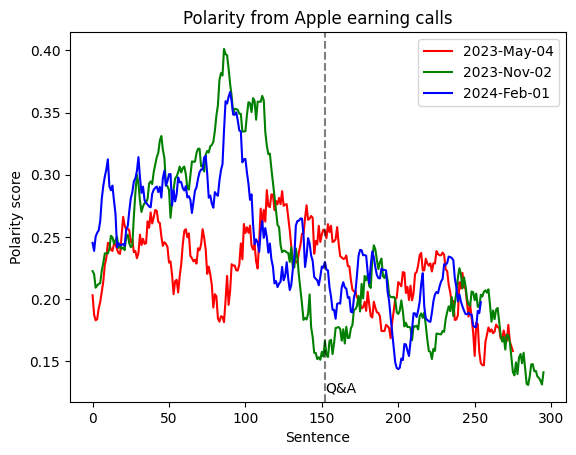

In [701]:
# plot the lines for each data

import matplotlib.pyplot as plt
colors = ['r', 'g', 'b']
for date in unique_dates:
    #moving average
    col = colors.pop(0)
    plt.plot(moving_average(aapl[date], 35), label=date, color=col)
plt.axvline(x=start_qna[date], linestyle='--', color='black', alpha=0.5)
# annote vertical line below the x-axis
plt.text(start_qna[date], 0.125, 'Q&A', rotation=0, color='black', alpha=1, fontsize=10)
# dimensions of the plot
plt.xlabel('Sentence')
plt.ylabel('Polarity score')
plt.title('Polarity from Apple earning calls')
plt.legend()
plt.show()

In [702]:
import wordcloud

In [703]:
data = pd.read_csv('../archives/sentiment_sentence_leveL.csv')
cp_text = data[data['speaker_type'] == 'Corporate Participant']['text']

In [704]:
total_text = ' '.join(cp_text)

In [705]:
# text pre processing
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove whitespaces
    text = text.strip()
    # remove stopwords
    stop_words = set(stopwords.words('english')) | {'think', 'well'}
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    # stemming
    return ' '.join(words)

In [706]:
wc = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(clean_text(total_text))

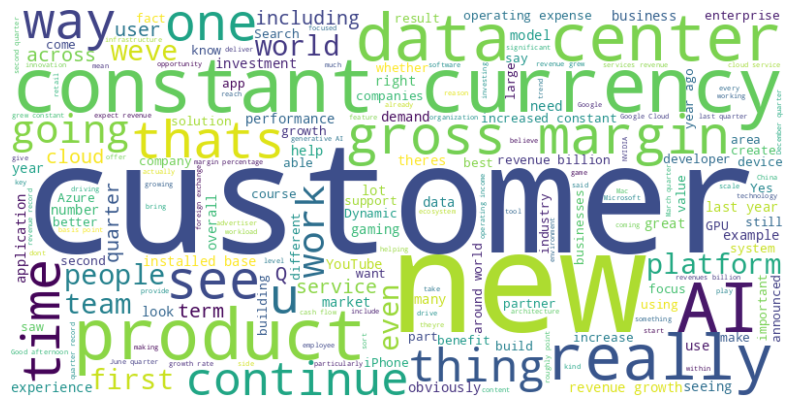

In [707]:
# plot white word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [708]:
output_data = pd.read_csv('../OutputData/final_output.csv', index_col=0)

In [709]:
output_data.head()

,company_name,date,positive_sentiment_bert_mean,positive_sentiment_bert_std,positive_sentiment_bert_median,positive_sentiment_bert_min,positive_sentiment_bert_max,positive_sentiment_bert_mean_company_sentiment,positive_sentiment_bert_std_company_sentiment,positive_sentiment_bert_min_company_sentiment,...,zcr_segment_14,mfcc_segment_14,tempo_segment_15,chroma_stft_segment_15,rmse_segment_15,spec_cent_segment_15,spec_bw_segment_15,rolloff_segment_15,zcr_segment_15,mfcc_segment_15
0,AAPL.OQ,2019-Apr-30,0.358972,0.192946,0.277938,0.016035,0.751716,0.392779,0.184891,0.030839,...,0.149786,-26.841318,133.928571,0.371483,0.006965,1425.530980,1161.199757,2607.518284,0.131786,-26.527506
1,AAPL.OQ,2019-Jan-29,0.336502,0.183826,0.243382,0.024460,0.752424,0.359022,0.183203,0.024460,...,0.145266,-26.735744,98.684211,0.367904,0.004406,1720.798919,1366.060803,3146.850330,0.151549,-28.432251
2,AAPL.OQ,2019-Jul-30,0.357039,0.190130,0.271027,0.030839,0.750525,0.391476,0.183220,0.030839,...,0.150026,-19.680310,81.521739,0.354355,0.031327,1276.930389,1031.816623,2400.989976,0.118722,-19.201391
3,AAPL.OQ,2019-Oct-30,0.356571,0.186389,0.271450,0.030839,0.748978,0.384006,0.181016,0.030839,...,0.116544,-23.536423,117.187500,0.375085,0.022066,1271.344585,826.333761,2089.088990,0.135488,-22.003664
4,AAPL.OQ,2020-Apr-30,0.343232,0.183023,0.251659,0.020865,0.745588,0.366671,0.180194,0.030839,...,0.142123,-21.207373,117.187500,0.384702,0.025991,1457.591280,1119.903524,2633.329327,0.145018,-21.556915


/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/2469207383.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_company[feature], label=company, shade=True)
/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/2469207383.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_company[feature], label=company, shade=True)
/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/2469207383.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_company[feature], label=company, shade=True)
/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/2469207383.py:7: FutureWarnin

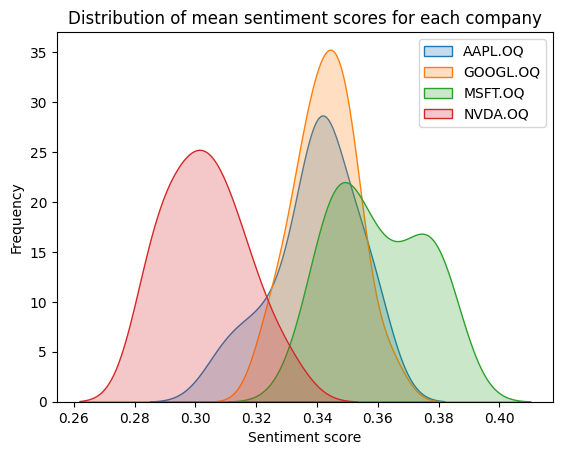

In [710]:
import seaborn as sns

feature = 'positive_sentiment_bert_mean'
unique_companies = output_data['company_name'].unique()
for company in unique_companies:
    data_company = output_data[output_data['company_name'] == company]
    sns.kdeplot(data_company[feature], label=company, shade=True)
    
plt.xlabel('Sentiment score')
plt.ylabel('Frequency')
plt.title('Distribution of mean sentiment scores for each company')
plt.legend()
plt.show()



/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/244469162.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_company[feature], label=company, shade=True)
/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/244469162.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_company[feature], label=company, shade=True)
/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/244469162.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_company[feature], label=company, shade=True)
/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/244469162.py:6: FutureWarning: 


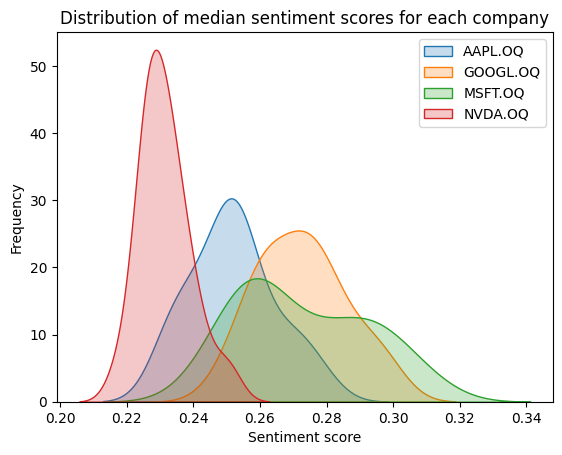

In [711]:
# same thing for max sentiment
feature = 'positive_sentiment_bert_median'
unique_companies = output_data['company_name'].unique()
for company in unique_companies:
    data_company = output_data[output_data['company_name'] == company]
    sns.kdeplot(data_company[feature], label=company, shade=True)

plt.xlabel('Sentiment score')
plt.ylabel('Frequency')
plt.title('Distribution of median sentiment scores for each company')
plt.legend()
plt.show()

In [712]:
price_data = pd.read_csv('combined.csv')[['Date', 'Close', 'Ticker']]

In [713]:
price_data.head()

,Date,Close,Ticker
0,4/22/2019,51.132500,AAPL
1,4/23/2019,51.869999,AAPL
2,4/24/2019,51.790001,AAPL
3,4/25/2019,51.320000,AAPL
4,4/26/2019,51.075001,AAPL


In [714]:
output_data.rename(columns = {'date': 'Date', 'company_name': 'Ticker'}, inplace = True)
map = {'AAPL.OQ': 'AAPL', 'MSFT.OQ': 'MSFT', 'NVDA.OQ': 'NVDA', 'GOOGL.OQ': 'GOOGL'}

In [715]:
output_data['Ticker'] = output_data['Ticker'].apply(lambda x: map[x])

In [716]:
# transform 2019-Apr-30 format to 04/30/2019 format and transforms into a string
output_data['Date'] = pd.to_datetime(output_data['Date'], format='%Y-%b-%d')

# Format datetime into the desired string format
output_data['Date'] = output_data['Date'].dt.strftime('%m/%d/%Y')


In [717]:
output_data

,Ticker,Date,positive_sentiment_bert_mean,positive_sentiment_bert_std,positive_sentiment_bert_median,positive_sentiment_bert_min,positive_sentiment_bert_max,positive_sentiment_bert_mean_company_sentiment,positive_sentiment_bert_std_company_sentiment,positive_sentiment_bert_min_company_sentiment,...,zcr_segment_14,mfcc_segment_14,tempo_segment_15,chroma_stft_segment_15,rmse_segment_15,spec_cent_segment_15,spec_bw_segment_15,rolloff_segment_15,zcr_segment_15,mfcc_segment_15
0,AAPL,04/30/2019,0.358972,0.192946,0.277938,0.016035,0.751716,0.392779,0.184891,0.030839,...,0.149786,-26.841318,133.928571,0.371483,0.006965,1425.530980,1161.199757,2607.518284,0.131786,-26.527506
1,AAPL,01/29/2019,0.336502,0.183826,0.243382,0.024460,0.752424,0.359022,0.183203,0.024460,...,0.145266,-26.735744,98.684211,0.367904,0.004406,1720.798919,1366.060803,3146.850330,0.151549,-28.432251
2,AAPL,07/30/2019,0.357039,0.190130,0.271027,0.030839,0.750525,0.391476,0.183220,0.030839,...,0.150026,-19.680310,81.521739,0.354355,0.031327,1276.930389,1031.816623,2400.989976,0.118722,-19.201391
3,AAPL,10/30/2019,0.356571,0.186389,0.271450,0.030839,0.748978,0.384006,0.181016,0.030839,...,0.116544,-23.536423,117.187500,0.375085,0.022066,1271.344585,826.333761,2089.088990,0.135488,-22.003664
4,AAPL,04/30/2020,0.343232,0.183023,0.251659,0.020865,0.745588,0.366671,0.180194,0.030839,...,0.142123,-21.207373,117.187500,0.384702,0.025991,1457.591280,1119.903524,2633.329327,0.145018,-21.556915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NVDA,05/25/2022,0.309786,0.175508,0.229057,0.014458,0.913179,0.324195,0.167350,0.035016,...,0.100422,-17.391720,144.230769,0.351368,0.042548,1198.584257,971.237144,2218.102781,0.111457,-17.212633
76,NVDA,08/23/2023,0.309998,0.160698,0.242431,0.024495,0.806016,0.327344,0.156404,0.035912,...,0.132061,-18.531000,93.750000,0.384952,0.074988,1480.533697,1102.907034,2645.192114,0.177000,-17.652760
77,NVDA,05/24/2023,0.285312,0.151245,0.218439,0.033638,0.932443,0.297392,0.147092,0.033638,...,0.113589,-14.000799,156.250000,0.389287,0.054317,1207.938842,1014.379765,2248.818584,0.130369,-13.344240
78,NVDA,11/21/2023,0.297461,0.152228,0.225640,0.029469,0.748012,0.309427,0.151187,0.034353,...,0.115875,-17.756030,98.684211,0.343496,0.076579,1326.501079,991.222667,2395.577064,0.137460,-18.649580


In [718]:
# merge the data
total = pd.merge(output_data, price_data, on=['Ticker', 'Date'], how='inner')

In [719]:
total.head()

,Ticker,Date,positive_sentiment_bert_mean,positive_sentiment_bert_std,positive_sentiment_bert_median,positive_sentiment_bert_min,positive_sentiment_bert_max,positive_sentiment_bert_mean_company_sentiment,positive_sentiment_bert_std_company_sentiment,positive_sentiment_bert_min_company_sentiment,...,mfcc_segment_14,tempo_segment_15,chroma_stft_segment_15,rmse_segment_15,spec_cent_segment_15,spec_bw_segment_15,rolloff_segment_15,zcr_segment_15,mfcc_segment_15,Close
0,AAPL,10/30/2019,0.356571,0.186389,0.271450,0.030839,0.748978,0.384006,0.181016,0.030839,...,-23.536423,117.187500,0.375085,0.022066,1271.344585,826.333761,2089.088990,0.135488,-22.003664,60.814999
1,AAPL,10/29/2020,0.355016,0.188791,0.264429,0.016624,0.885919,0.386725,0.182068,0.030839,...,-21.043344,110.294118,0.379186,0.027814,1306.658068,1061.110949,2405.095763,0.126874,-21.118996,115.320000
2,AAPL,10/28/2021,0.319578,0.184318,0.233434,0.027121,0.836649,0.368276,0.186981,0.031734,...,-23.879013,117.187500,0.398713,0.011690,1431.062276,1166.166644,2670.799419,0.133927,-23.695477,152.570007
3,AAPL,10/27/2022,0.340076,0.186303,0.252750,0.011304,0.823546,0.376076,0.184451,0.032096,...,-21.696640,98.684211,0.342604,0.018618,1447.219885,1150.277785,2658.712154,0.142003,-22.983168,144.800003
4,GOOGL,10/28/2019,0.338684,0.165231,0.265853,0.025600,0.658274,0.372012,0.161505,0.127425,...,-24.565200,117.187500,0.379458,0.015985,1421.201277,1089.916444,2567.750590,0.148042,-25.011307,64.448997


In [720]:
import xgboost as xgb

In [721]:
Y = total['Close']
X = total.drop(['Close', 'Date', 'Ticker'], axis=1)

In [722]:
# train test split
from sklearn.model_selection import train_test_split
# linear regression model
from sklearn.linear_model import LinearRegression
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# xgboost model
model = DecisionTreeRegressor(max_depth=3)
model.fit(X, Y)

# predict
Y_pred = model.predict(X)

/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_54620/114242882.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, color='red')


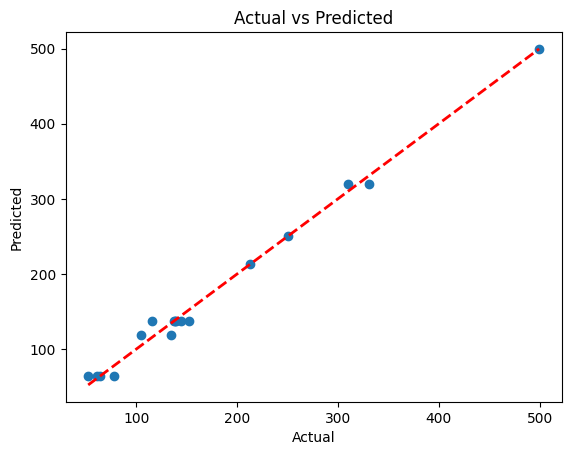

In [723]:
# plot the prediction vs actual

plt.scatter(Y, Y_pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

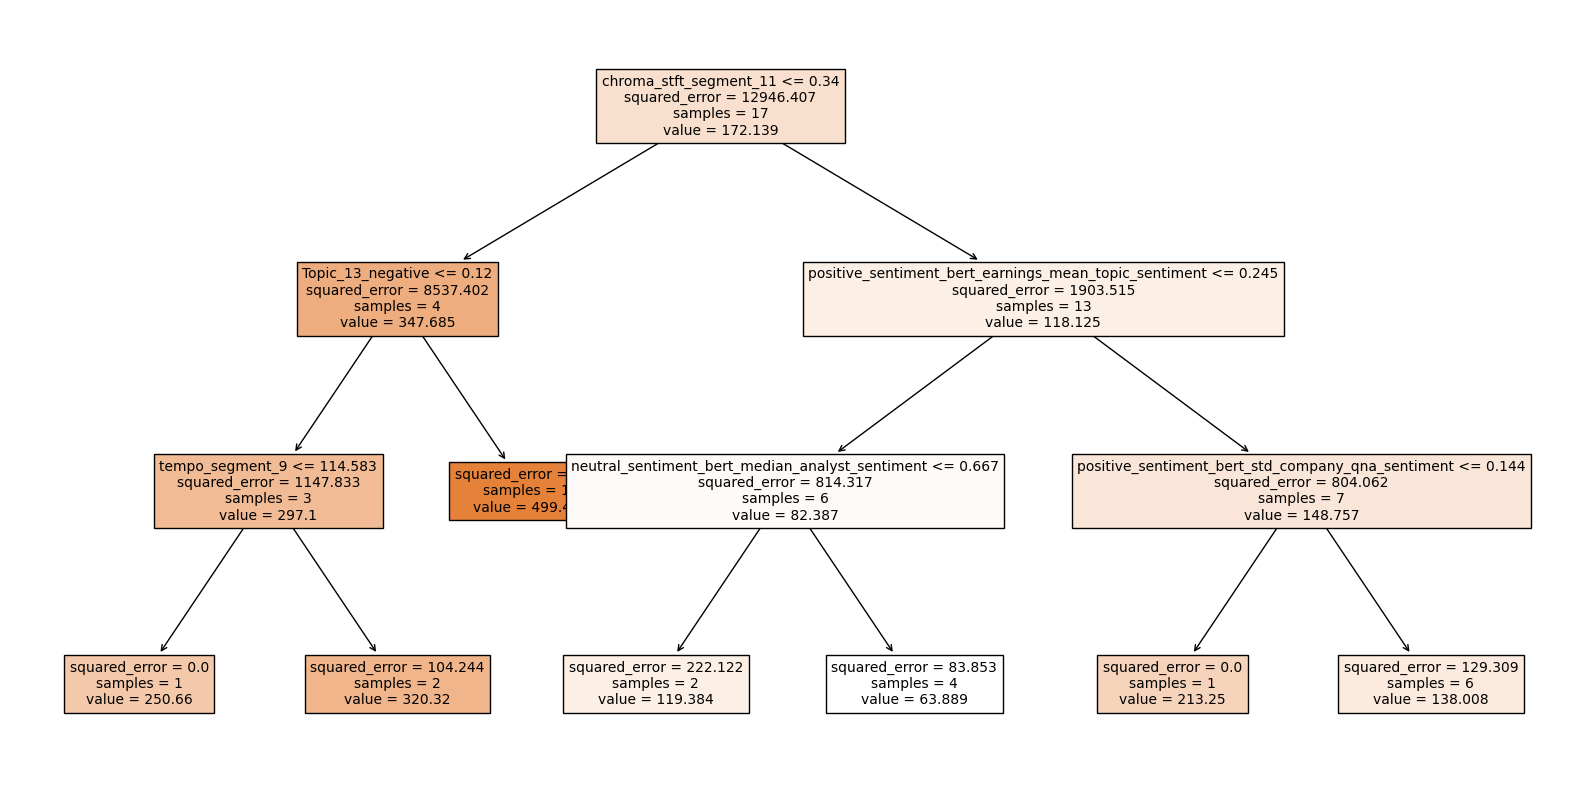

In [724]:
# plot the decision tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

